In [1]:
!pwd

/home/jovyan/mathieu/gent-commuters


In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../Thomas/gent-commuters/Thomas/Notebooks/')
from utils import *

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
track = "track6"
from track6 import *

In [4]:
melody_filename = os.path.join('components',root_name+'_melody.mid')
components_folder = os.path.join('components',root_name)
os.makedirs(components_folder, exist_ok=True)

In [5]:
import magenta
import magenta.music as mm
from magenta.protobuf import generator_pb2
from magenta.protobuf import music_pb2
from magenta.music.chord_inference import infer_chords_for_sequence
from magenta.music.chords_lib import extract_chords, BasicChordRenderer
from magenta.music.chord_symbols_lib import chord_symbol_bass, chord_symbol_pitches, chord_symbol_root
from magenta.music.chords_encoder_decoder import encoder_decoder
from magenta.music.midi_io import sequence_proto_to_pretty_midi, sequence_proto_to_midi_file, midi_file_to_sequence_proto

In [6]:
melody = magenta.music.sequences_lib.remove_redundant_data(midi_file_to_sequence_proto(melody_filename))
melody.tempos[0].qpm = bpm
quantized_melody = quantize_note_sequence(melody, 8)
infer_chords_for_sequence(quantized_melody)
chord_renderer = BasicChordRenderer(program=63)
chord_renderer.render(quantized_melody)

INFO:tensorflow:Sequence has key change from F to C at 68.307692 seconds.


In [7]:
chords = magenta.protobuf.music_pb2.NoteSequence()
chords.CopyFrom(quantized_melody)
bass = magenta.protobuf.music_pb2.NoteSequence()
bass.CopyFrom(quantized_melody)
notes_to_delete_from_chords = []
notes_to_delete_from_bass = []
idx = 0
for n in quantized_melody.notes:
    if n.program!=63:
        notes_to_delete_from_chords.append(n)
        notes_to_delete_from_bass.append(n)
    else:
        if n.pitch <= 47:
            notes_to_delete_from_chords.append(n)
        else:
            notes_to_delete_from_bass.append(n)
for n in notes_to_delete_from_chords:
    chords.notes.remove(n)
for n in notes_to_delete_from_bass:
    bass.notes.remove(n)
for n in bass.notes:
    n.program = 37

In [8]:
bar_length = 60.0 * float(beat_per_bar)/bpm
steps_per_bar = beat_per_bar * steps_per_beat *2

In [9]:
steps = pd.DataFrame.from_records([
    {
        'quality':magenta.music.chord_symbol_quality(c), 
        'chord':c, 
        'bar':int(idx/steps_per_bar),
        'step':idx
    } for idx, c in enumerate(extract_chords(quantized_melody)[0][0])])
steps['change'] = steps['chord'] != steps['chord'].shift()
changes = steps[steps['change']].copy()
changes['num_changes_in_bar'] = changes.groupby('bar')['step'].transform(lambda x : x.count())
changes['moment'] = changes['step'] % steps_per_bar
changes

bar  chord  quality  step change  num_changes_in_bar  moment
0       0     C7        0     0   True                   3       0
16      0      C        0    16   True                   3      16
32      0    Gm7        1    32   True                   3      32
80      1     C7        0    80   True                   1      16
176     2    Gm7        1   176   True                   1      48
224     3     C7        0   224   True                   1      32
304     4      C        0   304   True                   1      48
320     5    Gm7        1   320   True                   3       0
336     5     C7        0   336   True                   3      16
368     5      C        0   368   True                   3      48
384     6    Gm7        1   384   True                   2       0
400     6     C7        0   400   True                   2      16
528     8     Gm        1   528   True                   2      16
544     8     C7        0   544   True                   2      32
576     9    Gm7        1   576   True                   2       0
608     9     C7        0   608   True                   2      32
672    10    Gm7        1   672   True                   1      32
704    11  Gm7b5        3   704   True                   2       0
720    11     C7        0   720   True                   2      16
768    12    Gm7        1   768   True                   2       0
816    12     Gm        1   816   True                   2      48
832    13     C7        0   832   True                   1       0
896    14   Edim        3   896   True                   4       0
912    14      C        0   912   True                   4      16
928    14     C7        0   928   True                   4      32
944    14     Bb        0   944   True                   4      48
960    15    Dm7        1   960   True                   2       0
992    15     C7        0   992   True                   2      32
1024   16    Gm7        1  1024   True                   3       0
1040   16    Am7        1  1040   True                   3      16
...   ...    ...      ...   ...    ...                 ...     ...
1248   19     G7        0  1248   True                   2      32
1280   20     C7        0  1280   True                   2       0
1328   20     G7        0  1328   True                   2      48
1360   21     C7        0  1360   True                   1      16
1408   22     G7        0  1408   True                   3       0
1440   22     C7        0  1440   True                   3      32
1456   22  Cmaj7        0  1456   True                   3      48
1472   23     G7        0  1472   True                   3       0
1488   23      C        0  1488   True                   3      16
1520   23     G7        0  1520   True                   3      48
1552   24  Cmaj7        0  1552   True                   2      16
1568   24     C7        0  1568   True                   2      32
1648   25     G7        0  1648   True                   1      48
1712   26     C7        0  1712   True                   1      48
1728   27     G7        0  1728   True                   4       0
1744   27     Em        1  1744   True                   4      16
1760   27     G7        0  1760   True                   4      32
1776   27   Bdim        3  1776   True                   4      48
1824   28     Em        1  1824   True                   2      32
1840   28    Dm7        1  1840   True                   2      48
1856   29     Am        1  1856   True                   3       0
1872   29     G7        0  1872   True                   3      16
1888   29    Am7        1  1888   True                   3      32
1968   30      C        0  1968   True                   1      48
1984   31    Am7        1  1984   True                   4       0
2000   31    Em7        1  2000   True                   4      16
2016   31  Bm7b5        3  2016   True                   4      32
2032   31    Dm7        1  2032   True               

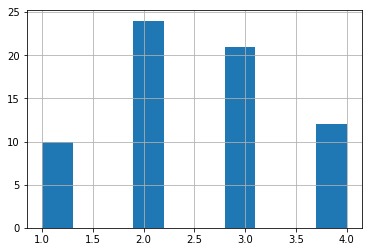

In [10]:
%matplotlib inline
changes['num_changes_in_bar'].hist()

In [ ]:
mm.play_sequence(melody, mm.midi_synth.fluidsynth)

In [11]:
#interet = 11
#for i in range(-2,3):
#    print(i+interet)
#    if len(chords_bars[interet+i].notes):
#        mm.play_sequence(chords_bars[interet+i], mm.midi_synth.fluidsynth)


In [11]:
# Cheap way to "unquantize": serialize through midi
sequence_proto_to_midi_file(chords, os.path.join(components_folder,'chords.mid'))
sequence_proto_to_midi_file(bass, os.path.join(components_folder, 'bass.mid'))
chords = midi_file_to_sequence_proto(os.path.join(components_folder,'chords.mid'))
bass = midi_file_to_sequence_proto(os.path.join(components_folder,'bass.mid'))
chords_bars = split_note_sequence(chords, bar_length)
bass_bars = split_note_sequence(bass, bar_length)
melody_bars = split_note_sequence(melody, bar_length)

In [12]:
#for i in range(6):
#    mm.play_sequence(melody_bars[i], mm.midi_synth.fluidsynth)

In [13]:
chords_bars = split_note_sequence(chords, 16*bar_length)
bass_bars = split_note_sequence(bass, 16*bar_length)
melody_bars = split_note_sequence(melody, 16*bar_length)

In [14]:
sequence_proto_to_midi_file(chords_bars[bar_offset], os.path.join(components_folder,'chords_16bar.mid'))
sequence_proto_to_midi_file(bass_bars[bar_offset], os.path.join(components_folder,'bass_16bar.mid'))
sequence_proto_to_midi_file(melody_bars[bar_offset], os.path.join(components_folder,'melody_16bar.mid'))

In [17]:
for i in range(1,2):
    mm.play_sequence(melody_bars[i], mm.midi_synth.fluidsynth)

In [17]:
funk = pretty_midi.PrettyMIDI('components/funk_30_melody.mid')
generate_mp3(funk.fluidsynth(),ext="_funk")

In [18]:
funk = pretty_midi.PrettyMIDI('.mid')
generate_mp3(funk.fluidsynth(),ext="_classical")